# todo: 
- coger libros random del drive

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from mongo import get_db, get_colls
from ut.base import json_save, json_read, json_update
from ut.textmining import get_word_matrix
from utils import get_fakes, get_frecuencia_words, agrega_a_dicc, quita_numeros, get_books, \
    cabeza_y_cola, corta, crea_capsulas, rompe_parrafo, get_book_datas, SUMMARIES_JSON, seleccion_txt, txt_read, \
    elige_libros_aleatorios
from ut.io import get_filename

In [3]:
PATH_CALIBRE = 'c:/Users/milen/Biblioteca de calibre/'
lang = "EN"  # >>>

In [4]:
[print(x) for x in elige_libros_aleatorios(1)]

c:\Users\milen\Desktop\del drive\NYT Best Sellers\Ender_s Game - Orson Scott Card\Orson Scott Card - Ender_s Game.epub


[None]

## a) Un libro en particular

In [6]:
one_book = True

In [5]:
# i) por el más reciente
last, all_ = seleccion_txt(PATH_CALIBRE)
book = get_filename(last[0], True)
book

** La ultima fecha de ficheros es:  20221114
                                                   0
0  Enders Game 2 - Speaker for the - Card, Orson ...


'Enders Game 2 - Speaker for the - Card, Orson Scott'

In [25]:
# ii) alternativamente, por patrón
# pat='Huasca'#<<<<<<
# book=[get_filename(x, True) for x in all_ if pat in x][0]
# book

'La Huasca - Milenko Halat'

In [7]:
file = [x for x in all_ if book in x]

### a.1) libros de referencia para hacer el tf-idf

In [8]:
date_es = 20220703 if lang == 'EN' else 20200504
files_es, _ = seleccion_txt(PATH_CALIBRE, fecha=date_es)
files = file + files_es
doc_list = [txt_read(x) for x in files]

                                                    0
0            Orphan Train - Christina Baker Kline.txt
1                             Inferno - Dan Brown.txt
2                     The Target - David Baldacci.txt
3                     The Goldfinch - Donna Tartt.txt
4          The One & Only_ A Novel - Emily Giffin.txt
5   The Girl Who Came Home - A Tita - Gaynor, Haze...
6                       Gone Girl - Gillian Flynn.txt
7    Conform_ Exposing the Truth Abo - Glenn Beck.txt
8             No Place to Hide - Greenwald, Glenn.txt
9   Unbroken_ A World War II Story - Hillenbrand, ...
10                   Unlucky 13 - James Patterson.txt
11                  Field of Prey - John Sandford.txt
12  Flash Boys_ A Wall Street Revol - Lewis, Micha...
13                    The Closer - Mariano Rivera.txt
14  Finding Me_ A Decade of Darknes - Michelle Kni...
15                Ender's Game - Orson Scott Card.txt
16                Sniper's Honor - Stephen Hunter.txt
17        The Lincoln Myth_ 

## b) De última extracción calibre

In [5]:
PATH_CALIBRE

'c:/Users/milen/Biblioteca de calibre/'

In [6]:
doc_list, files = get_books(PATH_CALIBRE)
files

** La ultima fecha de ficheros es:  20221102
                                                   0
0  Dexter 1 - Darkly Dreaming Dext - Lindsay, Jef...


['c:/Users/milen/Biblioteca de calibre\\Lindsay, Jeff\\Dexter 1 - Darkly Dreaming Dexter (218)\\Dexter 1 - Darkly Dreaming Dext - Lindsay, Jeff.txt']

# Continuamos

In [9]:
vector_matrix, vocab, _ = get_word_matrix(doc_list)

C:\Users\milen\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(
C:\Users\milen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
dic_fake, di_counts = get_fakes(doc_list, files, vector_matrix, vocab, lang)


** Iniciando: Get fakes
** Finalizado Get fakes.  Ha tardado 00:00:04


In [11]:
if one_book:
    dic_fake = {0: dic_fake[0]}

In [12]:
pd.DataFrame.from_dict(dic_fake)

,0
author,"Card, Orson Scott"
fakeAuthor,Olhado Ender
fakeTitle,Queen Eater Files
i,0
idioma,EN
listo,False
names,"[ender, novinha, pipo, libo, ela, bishop, olha..."
path,"c:/Users/milen/Biblioteca de calibre\Card, Ors..."
title,Enders Game 2 - Speaker for the Dea


In [13]:
j = {dic_fake[k]['title']: dic_fake[k] for k in dic_fake}
json_update(j, SUMMARIES_JSON)

** Guardado los datos  en data/summaries.json


## Get partes

#### a) por bulk

In [14]:
i_book = 1
file = files[i_book]
texto = doc_list[i_book]

#### b) Individual (del json)

In [15]:
j = json_read(SUMMARIES_JSON)
titles = sorted(list(j.keys()))
titles

['A Clockwork Orange',
 'Capital in the Twenty-First Century',
 'Conform_ Exposing the Truth About C',
 'Dexter 1 - Darkly Dreaming Dexter',
 "Ender's Game",
 'Enders Game 2 - Speaker for the Dea',
 'Field of Prey',
 'Finding Me_ A Decade of Darkness, a',
 'Flash Boys_ A Wall Street Revolt',
 'Gone Girl',
 "Heaven Is for Real_ A Little Boy's",
 "I've Got You Under My Skin_ A Novel",
 'Inferno',
 'La Huasca',
 'No Place to Hide',
 'Orphan Train',
 'Sandkings',
 "Sniper's Honor",
 'Stress Test_ Reflections on Financi',
 'Super Freakonomics',
 'The Closer',
 'The Girl Who Came Home - A Titanic',
 'The Goldfinch',
 'The Lincoln Myth_ A Novel',
 'The One & Only_ A Novel',
 'The Target',
 'Think Like a Freak_ The Authors of',
 'Unbroken_ A World War II Story of S',
 'Unlucky 13']

In [16]:
texto, img, titulo, d_summary = get_book_datas('Speaker')

Enders Game 2 - Speaker for the Dea


#### Continuamos

In [19]:
partes, df = cabeza_y_cola(texto, 58)

,parte,len
i,,
3831,"“We were a talented family,” said Ender. “I hope you like her.”",63
3832,"“I hope she likes me.” Miro smiled, but he looked afraid.",57
3833,"“I told her,” said Ender, “to think of you as my son.”",54
3834,"Miro nodded. “I know,” he said. And then, almost defiantly, “She showed me your conversation with her.”",103
3835,Ender felt cold inside.,23
3836,"Jane's voice came into his ear. “I should have asked you,” she said. “But you know you would have said yes.”",108
3837,"It wasn't the invasion of privacy that Ender minded. It was the fact that Jane was so very close to Miro. Get used to it, he told himself. He's th...",178
3838,"“We'll miss you,” said Ender.",29
3839,"“Those who will miss me, miss me already,” said Miro, “because they already think of me as dead.”",97


,parte,len
i,,
0,Speaker for the Dead,20
1,SPEAKER FOR THE DEAD,20
2,For Gregg Keizer,16
3,who already knew how,20
4,Contents,8
5,Introduction,12
6,Some People of Lusitania,24
7,Pronouncing Foreign Names,25
8,Prologue,8


In [20]:
fin = 3888  # >>>
ini = 28  # >>>

d_summary['min'], d_summary['max'] = ini, fin

In [21]:
d_summary

{'author': 'Card, Orson Scott',
 'title': 'Enders Game 2 - Speaker for the Dea',
 'fakeAuthor': 'Olhado Ender',
 'fakeTitle': 'Queen Eater Files',
 'path': 'c:/Users/milen/Biblioteca de calibre\\Card, Orson Scott\\Enders Game 2 - Speaker for the Dea (219)\\Enders Game 2 - Speaker for the - Card, Orson Scott.txt',
 'listo': False,
 'i': 0,
 'names': ['ender',
  'novinha',
  'pipo',
  'libo',
  'ela',
  'bishop',
  'olhado',
  'jane',
  'lusitania',
  'bosquinha',
  'quim',
  'rooter',
  'mandachuva',
  'grego',
  'peregrino',
  'dom',
  'marcão',
  'cristão',
  'quara',
  'andrew',
  'descolada',
  'valentine',
  'starways',
  'congress',
  'dona',
  'milagre',
  'ribeira',
  'mayor',
  'shouter',
  'wiggin',
  'trondheim',
  'hegemon',
  'god',
  'zenador',
  'oh',
  'navio',
  'cristã',
  'plikt',
  'station',
  'arrow',
  'xenocide',
  'marcos',
  'church',
  'stark',
  'portuguese',
  'ceifeiro',
  'catholic',
  'demosthenes',
  'san',
  'cathedral',
  'angelo',
  'lusitanian',
  'f

In [22]:
json_update({d_summary['title']: d_summary}, SUMMARIES_JSON)

** Guardado los datos  en data/summaries.json


Aquí se puede saltar al 02 si solo se quiere hacer un audiobook

## Cortar

In [94]:
partes, df = corta(partes, df, ini, fin)

In [95]:
df

,parte,len
0,Este libro es el resultado de las impresiones de tres años que —¡quién me lo hubiera dicho!— consumí en Estados Unidos. Sentí el primer impulso de...,2436
1,"Ellos no se obsesionan con trasformarnos a su semejanza, pero, sin querer, cada vez que nos asemejamos a sus modelos —y no hay día en que esto no ...",989
2,EL ORGULLO AMERICANO,20
3,"En las clases de high school, a la altura del último curso, no es insólito que algunos estudiantes confundan ante un mapa en blanco la ubicación d...",432
4,"La geografía importa menos en Norteamérica que en otras partes del mundo. Domiciliados en América, la nación se redondea como un espacio absoluto ...",650
...,...,...
369,Día tras día la diversidad del globo convertido en mercado global tiende a transformarse en un remedo de Estados Unidos. No importa si se trata de...,296
370,Se presenta Norteamérica como el anticipo del futuro del mundo. Un melting-pot ya en proceso de ser servido como el menú del porvenir. Pero ¿cuál ...,453
371,Los americanos son una selecta especie de empresarios. Pero ¿es ésa la especie superior? ¿Es ése el anhelado modelo de la especie? Todos pueden se...,603
372,"Los americanos son vendedores excelentes. Han alcanzado a vender su sistema hasta hacerlo creer la encarnación del futuro, pero, de hecho, Estados...",197


In [96]:
la = partes[0]
la

'Este libro es el resultado de las impresiones de tres años que —¡quién me lo hubiera dicho!— consumí en Estados Unidos. Sentí el primer impulso de escribir mi experiencia allí durante el curso 1984-85, cuando la Fundación Nieman y una ayuda de la Fundación March me obsequiaran con los fondos para sostenerme en la Universidad de Harvard comiendo un día con John Kenneth Galbraith, cenando otro con David Riesman y Daniel Bell en el Faculty Club, paseando con Carlos Fuentes, que estaba por allí hablando de los mitos mexicanos y embobando a las alumnas. Viví sobre todo muy cerca de Juan Marichal y Sólita Salinas, que fueron mis sabios y cariñosos lazarillos en el laberinto universitario y en los supermercados. Fue un año de mucho estudio y de mucha pasión también por causa de una chica rubia del Center of European Studies a la que no conseguí interesar por más empeño que puse en las visitas a la biblioteca que ella regentaba con elegancia turbadora. Fuera porque no me sentía capaz de poner

largos: [553, 569, 580, 728]


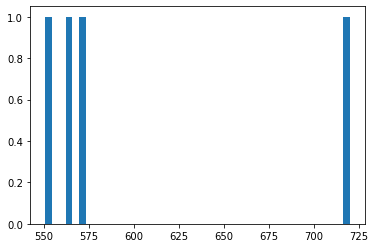

In [103]:
capsu = rompe_parrafo(la)

In [104]:
capsu

['Este libro es el resultado de las impresiones de tres años que —¡quién me lo hubiera dicho!— consumí en Estados Unidos. Sentí el primer impulso de escribir mi experiencia allí durante el curso 1984-85, cuando la Fundación Nieman y una ayuda de la Fundación March me obsequiaran con los fondos para sostenerme en la Universidad de Harvard comiendo un día con John Kenneth Galbraith, cenando otro con David Riesman y Daniel Bell en el Faculty Club, paseando con Carlos Fuentes, que estaba por allí hablando de los mitos mexicanos y embobando a las alumnas',
 'Viví sobre todo muy cerca de Juan Marichal y Sólita Salinas, que fueron mis sabios y cariñosos lazarillos en el laberinto universitario y en los supermercados. Fue un año de mucho estudio y de mucha pasión también por causa de una chica rubia del Center of European Studies a la que no conseguí interesar por más empeño que puse en las visitas a la biblioteca que ella regentaba con elegancia turbadora. Fuera porque no me sentía capaz de p

***** 0
******* nacc=0 nnew=2436 nfut=2436
  ** >> pasamos 2436
delta abajo: 300, delta arriba 1437 nacc 0  nnew2436 nfut 2436
>>preferimos quedarnos cortos
***** 1
******* nacc=2436 nnew=989 nfut=3425
  ** >> pasamos 3425
delta abajo: -2136, delta arriba 2426 nacc 2436  nnew989 nfut 3425
>>preferimos quedarnos cortos
***** 2
******* nacc=989 nnew=20 nfut=1009
  ** >> pasamos 1009
delta abajo: -689, delta arriba 10 nacc 989  nnew20 nfut 1009
>>preferimos quedarnos cortos
***** 3
******* nacc=20 nnew=432 nfut=452
***caemos dentro: 452
***** 4
******* nacc=0 nnew=650 nfut=650
***caemos dentro: 650
***** 5
******* nacc=0 nnew=909 nfut=909
***caemos dentro: 909
***** 6
******* nacc=0 nnew=714 nfut=714
***caemos dentro: 714
***** 7
******* nacc=0 nnew=306 nfut=306
***caemos dentro: 306
***** 8
******* nacc=0 nnew=626 nfut=626
***caemos dentro: 626
***** 9
******* nacc=0 nnew=452 nfut=452
***caemos dentro: 452
***** 10
******* nacc=0 nnew=1177 nfut=1177
  ** >> pasamos 1177
delta abajo: 300,

******* nacc=0 nnew=661 nfut=661
***caemos dentro: 661
***** 131
******* nacc=0 nnew=794 nfut=794
***caemos dentro: 794
***** 132
******* nacc=0 nnew=1077 nfut=1077
  ** >> pasamos 1077
delta abajo: 300, delta arriba 78 nacc 0  nnew1077 nfut 1077
>>> preferimos pasarnos 1077
***** 133
******* nacc=0 nnew=1493 nfut=1493
  ** >> pasamos 1493
delta abajo: 300, delta arriba 494 nacc 0  nnew1493 nfut 1493
>>preferimos quedarnos cortos
***** 134
******* nacc=1493 nnew=1476 nfut=2969
  ** >> pasamos 2969
delta abajo: -1193, delta arriba 1970 nacc 1493  nnew1476 nfut 2969
>>preferimos quedarnos cortos
***** 135
******* nacc=1476 nnew=858 nfut=2334
  ** >> pasamos 2334
delta abajo: -1176, delta arriba 1335 nacc 1476  nnew858 nfut 2334
>>preferimos quedarnos cortos
***** 136
******* nacc=858 nnew=415 nfut=1273
  ** >> pasamos 1273
delta abajo: -558, delta arriba 274 nacc 858  nnew415 nfut 1273
>>preferimos quedarnos cortos
***** 137
******* nacc=415 nnew=568 nfut=983
***caemos dentro: 983
***** 

******* nacc=724 nnew=812 nfut=1536
  ** >> pasamos 1536
delta abajo: -424, delta arriba 537 nacc 724  nnew812 nfut 1536
>>preferimos quedarnos cortos
***** 225
******* nacc=812 nnew=557 nfut=1369
  ** >> pasamos 1369
delta abajo: -512, delta arriba 370 nacc 812  nnew557 nfut 1369
>>preferimos quedarnos cortos
***** 226
******* nacc=557 nnew=475 nfut=1032
  ** >> pasamos 1032
delta abajo: -257, delta arriba 33 nacc 557  nnew475 nfut 1032
>>preferimos quedarnos cortos
***** 227
******* nacc=475 nnew=38 nfut=513
***caemos dentro: 513
***** 228
******* nacc=0 nnew=990 nfut=990
***caemos dentro: 990
***** 229
******* nacc=0 nnew=540 nfut=540
***caemos dentro: 540
***** 230
******* nacc=0 nnew=464 nfut=464
***caemos dentro: 464
***** 231
******* nacc=0 nnew=712 nfut=712
***caemos dentro: 712
***** 232
******* nacc=0 nnew=506 nfut=506
***caemos dentro: 506
***** 233
******* nacc=0 nnew=318 nfut=318
***caemos dentro: 318
***** 234
******* nacc=0 nnew=800 nfut=800
***caemos dentro: 800
***** 2

>>preferimos quedarnos cortos
***** 306
******* nacc=494 nnew=1709 nfut=2203
  ** >> pasamos 2203
delta abajo: -194, delta arriba 1204 nacc 494  nnew1709 nfut 2203
>>preferimos quedarnos cortos
***** 307
******* nacc=1709 nnew=19 nfut=1728
  ** >> pasamos 1728
delta abajo: -1409, delta arriba 729 nacc 1709  nnew19 nfut 1728
>>preferimos quedarnos cortos
***** 308
******* nacc=19 nnew=600 nfut=619
***caemos dentro: 619
***** 309
******* nacc=0 nnew=794 nfut=794
***caemos dentro: 794
***** 310
******* nacc=0 nnew=1485 nfut=1485
  ** >> pasamos 1485
delta abajo: 300, delta arriba 486 nacc 0  nnew1485 nfut 1485
>>preferimos quedarnos cortos
***** 311
******* nacc=1485 nnew=214 nfut=1699
  ** >> pasamos 1699
delta abajo: -1185, delta arriba 700 nacc 1485  nnew214 nfut 1699
>>preferimos quedarnos cortos
***** 312
******* nacc=214 nnew=634 nfut=848
***caemos dentro: 848
***** 313
******* nacc=0 nnew=688 nfut=688
***caemos dentro: 688
***** 314
******* nacc=0 nnew=1087 nfut=1087
  ** >> pasamo

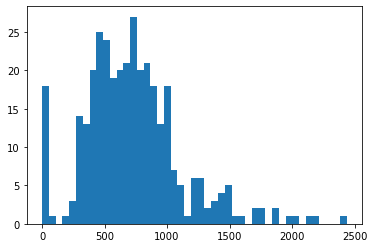

In [10]:
d_summary = crea_capsulas(partes, df, lmin=300, lmax=999)

In [22]:
d_summary[1]

{'ies': [0],
 'texto': ['Este libro es el resultado de las impresiones de tres años que —¡quién me lo hubiera dicho!— consumí en Estados Unidos. Sentí el primer impulso de escribir mi experiencia allí durante el curso 1984-85, cuando la Fundación Nieman y una ayuda de la Fundación March me obsequiaran con los fondos para sostenerme en la Universidad de Harvard comiendo un día con John Kenneth Galbraith, cenando otro con David Riesman y Daniel Bell en el Faculty Club, paseando con Carlos Fuentes, que estaba por allí hablando de los mitos mexicanos y embobando a las alumnas. Viví sobre todo muy cerca de Juan Marichal y Sólita Salinas, que fueron mis sabios y cariñosos lazarillos en el laberinto universitario y en los supermercados. Fue un año de mucho estudio y de mucha pasión también por causa de una chica rubia del Center of European Studies a la que no conseguí interesar por más empeño que puse en las visitas a la biblioteca que ella regentaba con elegancia turbadora. Fuera porque no 

In [23]:
d_summary[2]

{'ies': [1],
 'texto': ['Ellos no se obsesionan con trasformarnos a su semejanza, pero, sin querer, cada vez que nos asemejamos a sus modelos —y no hay día en que esto no pase—, empeoramos la salud y las buenas costumbres. Europa tiene sus cosas, sus pecados por lavar, pero no debe llevarlos a las tintorerías de aquel barrio. Al circo americano van sobre todo los niños, y Europa es un continente demasiado adulto para copiar el éxito de sus bromas, ligeras unas y otras muy pesadas. No he visto la necesidad de repetir cada dos por tres en los capítulos de qué modo el sistema americano se filtra en nuestros sistemas. Esto lo comprueba uno mismo en cualquier momento, en cualquier televisor, desde cualquier esquina, en los numerosos detalles que anuncian la simplificación del sentido de la vida. Ahora que ningún orden social ni político se opone a su modelo, abatido el comunismo, degenerado el socialismo, queda, sin embargo, algo por vindicar: no llegar a ser fatalmente una parodia del plan

In [20]:
[len(' '.join(d_summary[x]['texto'])) for x in d_summary]

[2436,
 989,
 20,
 432,
 650,
 909,
 714,
 306,
 626,
 452,
 1177,
 1427,
 212,
 344,
 660,
 967,
 1022,
 448,
 844,
 828,
 1044,
 1323,
 55,
 1256,
 1595,
 508,
 377,
 916,
 373,
 639,
 430,
 591,
 922,
 433,
 743,
 462,
 1200,
 476,
 1035,
 382,
 917,
 606,
 247,
 744,
 727,
 538,
 348,
 741,
 747,
 344,
 499,
 766,
 976,
 980,
 376,
 330,
 1041,
 838,
 2050,
 518,
 494,
 615,
 789,
 627,
 751,
 1115,
 934,
 474,
 17,
 1021,
 396,
 568,
 803,
 318,
 976,
 730,
 834,
 676,
 1556,
 633,
 1881,
 687,
 557,
 766,
 716,
 929,
 684,
 874,
 609,
 739,
 1508,
 469,
 450,
 1507,
 298,
 571,
 1258,
 589,
 654,
 503,
 554,
 325,
 396,
 519,
 620,
 1456,
 277,
 547,
 685,
 578,
 499,
 1711,
 265,
 295,
 748,
 431,
 427,
 864,
 774,
 634,
 694,
 661,
 794,
 1077,
 1493,
 1476,
 858,
 415,
 568,
 303,
 579,
 450,
 717,
 913,
 565,
 740,
 304,
 568,
 749,
 789,
 619,
 709,
 910,
 639,
 1735,
 604,
 1117,
 415,
 1208,
 2157,
 444,
 695,
 368,
 945,
 569,
 325,
 1000,
 420,
 584,
 1041,
 830,
 857,
 

In [16]:
len(d_summary)

348

In [17]:
id_free = 999

In [107]:
dic_fake[i_book]["nCapitulos"] = len(d_summary)
dic_fake[i_book]["min"] = ini
dic_fake[i_book]["max"] = fin
dic_fake[i_book]["idioma"] = lang
dic_fake[i_book]["libroId"] = id_free

In [108]:
dic_fake[i_book]

{'author': 'Vicente Verdu',
 'title': 'El planeta americano',
 'fakeAuthoro': 'Chicago Mcdonald’s',
 'fakeTitle': 'Nación 000 Norteamericanos',
 'path': 'c:/Users/milen/Biblioteca de calibre\\Vicente Verdu\\El planeta americano (89)\\El planeta americano - Vicente Verdu.txt',
 'listo': False,
 'i': 1,
 'nCapitulos': 348,
 'min': 13,
 'max': 386,
 'idioma': 'ES',
 'libroId': 999}

In [109]:
d_summaries = {}

In [116]:
j = 'data/summary_ex.json'

In [ ]:
d_summaries = json_read(j)

In [114]:
d_summaries[dic_fake[i_book]['title']] = dic_fake[i_book]

In [117]:
json_save(d_summaries, j)

** Guardado los datos  en data/summary_ex.json


In [24]:
dic_fake

{0: {'author': 'Yuval Noah Harari',
  'title': 'Homo Deus',
  'fakeAuthor': 'Press Unidos',
  'fakeTitle': 'Global Com Lector',
  'path': 'c:/Users/milen/Biblioteca de calibre\\Yuval Noah Harari\\Homo Deus (88)\\Homo Deus - Yuval Noah Harari.txt',
  'listo': False,
  'i': 0},
 1: {'author': 'Vicente Verdu',
  'title': 'El planeta americano',
  'fakeAuthor': 'Mcdonald’s Unidos',
  'fakeTitle': 'Americano Televisión Mercado',
  'path': 'c:/Users/milen/Biblioteca de calibre\\Vicente Verdu\\El planeta americano (89)\\El planeta americano - Vicente Verdu.txt',
  'listo': False,
  'i': 1},
 2: {'author': 'Haruki Murakami',
  'title': 'De que hablo cuando hablo de correr',
  'fakeAuthor': 'Jingu York',
  'fakeTitle': 'Corredores Músculos Kilómetros',
  'path': 'c:/Users/milen/Biblioteca de calibre\\Haruki Murakami\\De que hablo cuando hablo de correr (174)\\De que hablo cuando hablo de co - Haruki Murakami.txt',
  'listo': False,
  'i': 2},
 3: {'author': 'Michael Moorcock',
  'title': 'El ba

# Conexión

In [ ]:
conf = json_read('data/config.json')
db = get_db(conf['mdb_usr'], conf['mdb_passw'])
c_lib, c_lib_sum = get_colls(db)

In [ ]:
# ejemplo de inserción
j2 = {'libroId': 999, 'nCapitulos': 999, 'title': 'fake', 'author': 'fake', 'fakeTitle': 'fake', 'fakeAuthor': 'fake',
      'idioma':  'es'}
j3 = {'libroId': 888, 'nCapitulos': 999, 'title': 'fake', 'author': 'fake', 'fakeTitle': 'fake', 'fakeAuthor': 'fake',
      'idioma':  'es'}
dics = [j2, j3]
dics
res = c_lib_sum.insert_many(dics)

# Update Diccionario

In [99]:
conteo = get_frecuencia_words(di_counts)
dicc_file = agrega_a_dicc(conteo, 'data/diccionario.csv')

antes (78495, 2)
después: (82572, 4)


In [100]:
dicc_file

,n,r
word,,
de,1058363.0,1.000000
la,706593.0,0.999988
que,672577.0,0.999976
y,636396.0,0.999964
el,510314.0,0.999952
...,...,...
largaría,1.0,0.000061
laos,1.0,0.000048
lanzarote,1.0,0.000036


In [101]:
dicc_file = quita_numeros(dicc_file)

antes: (82572, 2)
después: (81469, 2)


In [102]:
save_df(dicc_file, 'data', 'diccionario2.csv', True)

** Guardando dataset en data/diccionario2.csv_81k_2.csv


'data/diccionario2.csv_81k_2.csv'

In [103]:
aa = pd.read_csv('data/diccionario.csv', sep=';')
aa.shape

(78495, 3)

In [105]:
aa = pd.read_csv('data/diccionario2.csv_81k_2.csv', sep=';')
aa.shape

(81469, 1)

In [114]:
dicc_file[dicc_file.n < 4].sample(30)

,n,r
word,,
ilu­minado,3.0,0.087403
porcino,1.0,0.016567
viriato,3.0,0.054425
immortality,1.0,0.008768
eurasiática,1.0,0.007375
«rat,1.0,0.029332
precis,3.0,0.064526
epónimos,2.0,0.039178
desenrollar,3.0,0.113477
